In [2]:
import pandas as pd

filepath = "nifty_fifty.csv"   
df = pd.read_csv(filepath)

# Display the first few rows
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,30-Jul-24,24839.40,24971.75,24798.65,24857.30,384989431,37576.58
1,31-Jul-24,24886.70,24984.60,24856.50,24951.15,333646302,35411.32
2,1-Aug-24,25030.95,25078.30,24956.40,25010.90,431313292,38822.90
3,2-Aug-24,24789.00,24851.90,24686.85,24717.70,345027881,35368.54
4,5-Aug-24,24302.85,24350.05,23893.70,24055.60,486994718,45066.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             127 non-null    object 
 1   Open             127 non-null    float64
 2   High             127 non-null    float64
 3   Low              127 non-null    float64
 4   Close            127 non-null    float64
 5   Shares Traded    127 non-null    int64  
 6   Turnover (₹ Cr)  127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
count,127.000000,127.000000,127.000000,127.000000,1.270000e+02,127.000000
mean,24452.412205,24559.081890,24314.801969,24422.829528,2.891581e+08,30342.201654
std,745.052162,742.198116,765.005118,762.238109,8.599530e+07,10803.020195
min,22940.150000,23007.450000,22786.900000,22829.150000,3.881139e+07,3348.450000
25%,23896.825000,24077.875000,23776.075000,23895.350000,2.390233e+08,25140.035000
50%,24386.850000,24503.350000,24280.200000,24435.500000,2.759519e+08,28046.450000
75%,25024.125000,25085.850000,24890.975000,24976.625000,3.170228e+08,33111.485000
max,26248.250000,26277.350000,26151.400000,26216.050000,6.871728e+08,89554.910000


In [8]:
!pip3 install matplotlib seaborn

  Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.8-cp313-cp313-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl (8.0 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.8-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11

        Date      Open      High       Low     Close  Shares Traded  \
0  30-Jul-24  24839.40  24971.75  24798.65  24857.30      384989431   
1  31-Jul-24  24886.70  24984.60  24856.50  24951.15      333646302   
2   1-Aug-24  25030.95  25078.30  24956.40  25010.90      431313292   
3   2-Aug-24  24789.00  24851.90  24686.85  24717.70      345027881   
4   5-Aug-24  24302.85  24350.05  23893.70  24055.60      486994718   

   Turnover (₹ Cr)  
0         37576.58  
1         35411.32  
2         38822.90  
3         35368.54  
4         45066.65  
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Shares Traded, Turnover (₹ Cr)]
Index: []


/var/folders/1x/tlw063s96_3bbm610426fmrm0000gn/T/ipykernel_83188/2106830668.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Automatically detects format


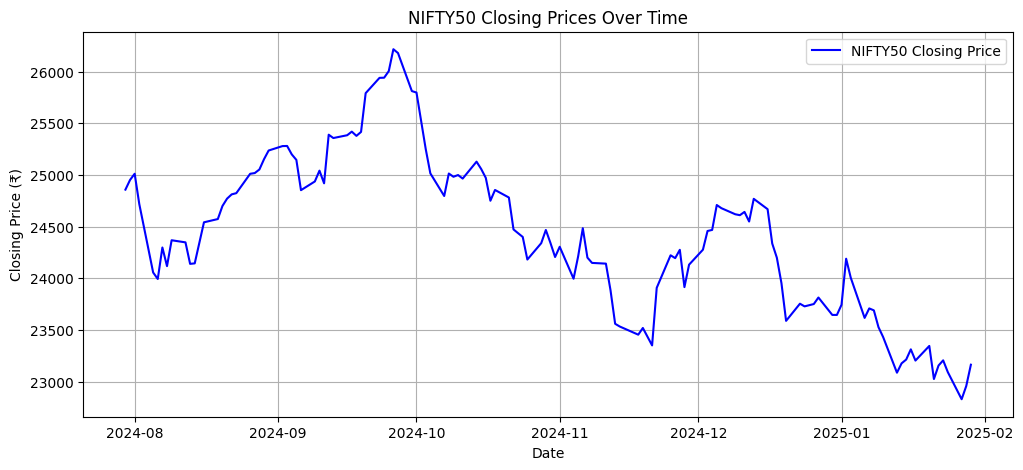

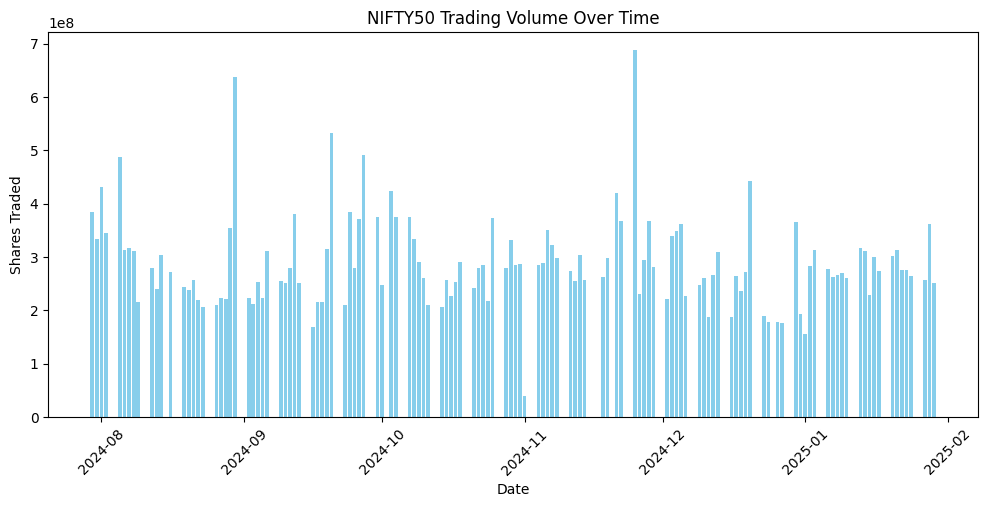

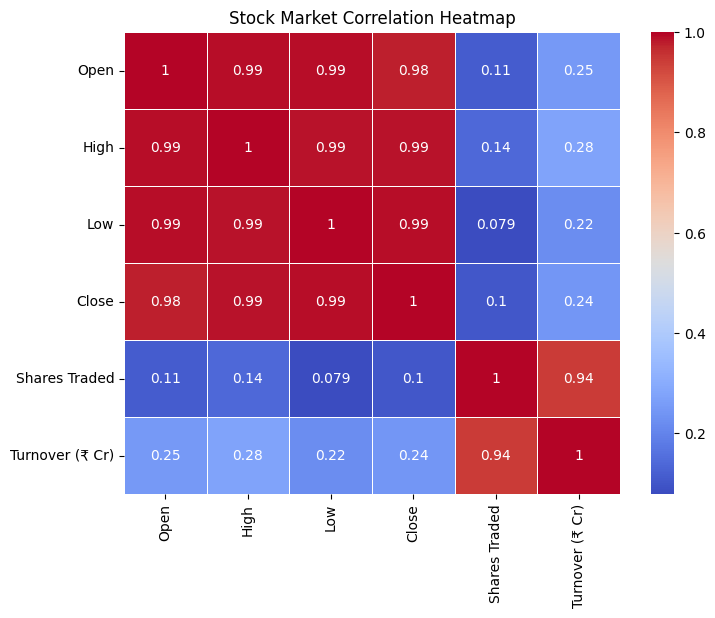

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("nifty_fifty.csv")

# Check the first few rows to see the actual date format
print(df.head())

# Convert Date column to datetime, handling different formats
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Automatically detects format

# Check if there are any NaT (Not a Time) values
print(df[df["Date"].isna()])

# Drop rows where date conversion failed (optional)
df = df.dropna(subset=["Date"])

# Sort by date for proper visualization
df = df.sort_values("Date")

def plot_closing_prices(df):
    """Plots the closing prices over time."""
    plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["Close"], label="NIFTY50 Closing Price", color="blue")
    
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.title("NIFTY50 Closing Prices Over Time")
    plt.legend()
    plt.grid()
    plt.show()

def plot_trading_volume(df):
    """Creates a bar chart of trading volume."""
    plt.figure(figsize=(12, 5))
    plt.bar(df["Date"], df["Shares Traded"], color="skyblue")
    
    plt.xlabel("Date")
    plt.ylabel("Shares Traded")
    plt.title("NIFTY50 Trading Volume Over Time")
    plt.xticks(rotation=45)
    plt.show()

def plot_correlation_heatmap(df):
    """Generates a heatmap for numerical correlations."""
    correlation_matrix = df[["Open", "High", "Low", "Close", "Shares Traded", "Turnover (₹ Cr)"]].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Stock Market Correlation Heatmap")
    plt.show()

# Call functions to visualize data
plot_closing_prices(df)
plot_trading_volume(df)
plot_correlation_heatmap(df)


In [6]:
import time
import contextlib

def execution_timer(func):
    """Decorator to measure execution time of functions."""
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"{func.__name__} executed in {end - start:.4f} seconds")
        return result
    return wrapper

@contextlib.contextmanager
def file_handler(filename, mode):
    """Context manager for file handling."""
    file = open(filename, mode)
    try:
        yield file
    finally:
        file.close()

# Example usage of the decorator and context manager
@execution_timer
def some_function():
    print("Starting file operation...")
    with file_handler('test.txt', 'w') as f:
        f.write("Hello, World!")
    time.sleep(2)  # Simulating some processing time
    print("File operation completed.")

some_function()

# Read the file content to verify it's written correctly
with open('test.txt', 'r') as f:
    content = f.read()
    print(f"Content of 'test.txt': {content}")


Starting file operation...
File operation completed.
some_function executed in 2.0065 seconds
Content of 'test.txt': Hello, World!
